In [150]:
# Import packages
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm

In [151]:
# Load the relative_errors dictionary from file
with open('results/QGdetv1.pkl', 'rb') as f:
    relative_errors = pickle.load(f)
    
# # Create a new dictionary with detached tensor values converted to float
relative_errors = {
    n_local_step: {step_size: np.log10(value.detach().item()) for step_size, value in step_size_dict.items()}
    for n_local_step, step_size_dict in relative_errors.items()
}

# relative_errors = {
#     n_local_step: {step_size: value.detach().item() for step_size, value in step_size_dict.items()}
#     for n_local_step, step_size_dict in relative_errors.items()
# }


In [152]:
# Assume relative_error is a dictionary with keys as (n_local_step, step_size)
# and values as the corresponding relative errors (after removing gradients).

# Convert the relative_error dictionary into a 2D NumPy array or DataFrame
n_local_steps = sorted(relative_errors.keys())
step_sizes = sorted(relative_errors[n_local_steps[0]].keys())
# step_sizes = step_sizes[:-1]

# Create a 2D matrix where each entry is the relative error for a (local_step, step_size) pair
heatmap_data = np.zeros((len(n_local_steps), len(step_sizes)))

for i, n_local_step in enumerate(n_local_steps):
    for j, step_size in enumerate(step_sizes):
        # Assuming relative_error is already free of gradients (use .item() if needed for tensors)
        heatmap_data[i, j] = relative_errors[n_local_step][step_size]

/tmp/ipykernel_257086/1394575551.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('hot')


<Figure size 1000x800 with 0 Axes>

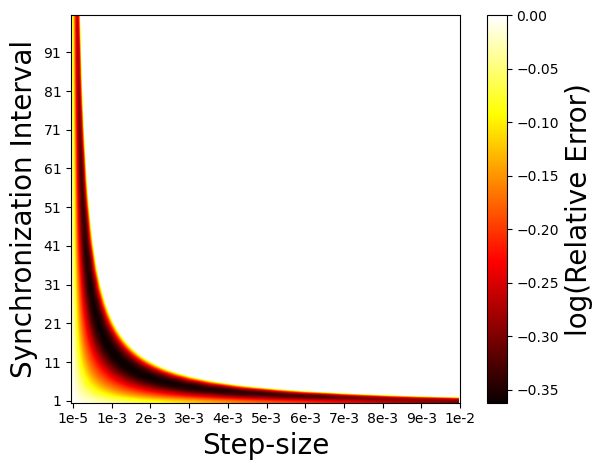

In [158]:
plt.figure(figsize=(10, 8))
# plt.axis('off')
cmap = cm.get_cmap('hot')
cmap.set_bad(color='white')

im, ax =plt.subplots()
im = plt.imshow(heatmap_data, origin='lower', cmap = cmap, interpolation = 'bicubic', vmax = 0)
plt.xlabel("Step-size", fontsize = 20)
plt.ylabel("Synchronization Interval", fontsize = 20)

x_values = ['1e-5', '1e-3', '2e-3', '3e-3', '4e-3', '5e-3', '6e-3', '7e-3', '8e-3', '9e-3', '1e-2']
ax.set_xticks(range(0, 101, 10))
ax.set_xticklabels(x_values)

ax.set_yticks(range(0, 100, 10))
ax.set_yticklabels([i for i in range(1, 101, 10)])

# plt.xticks(xticks_values, xticks_labels)  # Removes the x-axis ticks
# plt.yticks()  # Removes the y-axis ticks

cbar = plt.colorbar(im)
cbar.set_label('log(Relative Error)', fontsize = 20)
cbar.ax.tick_params(labelsize=10)

# Save the figure
plt.tight_layout()
plt.savefig('plots/heatmap.pdf', format = 'pdf', bbox_inches = 'tight')

plt.show()